Upload and Read the CSV File

In [1]:
import csv
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Function to read the CSV file
def read_csv(filename):
    items = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            items.append(float(row[0]))  # Use float to handle both integers and floating-point numbers
    return items

# Assuming the uploaded file is named 'items.csv'
items = read_csv('items(1).csv')
print(items[:10])  # Print the first 10 items to verify the contents


Saving items(1).csv to items(1).csv
[36.6, 26.8, 36.6, 43.0, 26.3, 30.7, 41.4, 28.7, 29.9, 49.5]


Implement Tabu Search Algorithm

In [2]:
import random
import copy

# Function to perform the first-fit bin packing
def first_fit(items, bin_capacity):
    bins = []
    for item in items:
        placed = False
        for bin in bins:
            if sum(bin) + item <= bin_capacity:
                bin.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

# Function to find a neighbor solution by moving an item from one bin to another
def neighbor(solution, bin_capacity):
    new_solution = [bin.copy() for bin in solution]
    bin1, bin2 = random.sample(range(len(new_solution)), 2)
    if not new_solution[bin1] or not new_solution[bin2]:
        return new_solution
    item = new_solution[bin1].pop(random.randrange(len(new_solution[bin1])))
    new_solution[bin2].append(item)
    if not new_solution[bin1]:
        del new_solution[bin1]
    return new_solution

# Function to calculate the cost of a solution (number of bins used)
def cost(solution):
    return len(solution)

# Tabu Search Algorithm
def tabu_search(items, bin_capacity, tabu_size, iterations):
    current_solution = first_fit(items, bin_capacity)
    best_solution = current_solution
    best_cost = cost(best_solution)

    tabu_list = []

    for _ in range(iterations):
        neighborhood = [neighbor(current_solution, bin_capacity) for _ in range(100)]
        neighborhood = [s for s in neighborhood if s not in tabu_list]

        neighborhood_costs = [cost(s) for s in neighborhood]
        best_neighbor = neighborhood[neighborhood_costs.index(min(neighborhood_costs))]

        current_solution = best_neighbor
        current_cost = cost(current_solution)

        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        tabu_list.append(current_solution)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

    return best_solution

# Parameters
bin_capacity = 100
tabu_size = 50
iterations = 1000

# Find the minimum number of bins required
bins = tabu_search(items, bin_capacity, tabu_size, iterations)

# Output the total number of bins used
print(f"Total number of bins used: {len(bins)}")

# Save the bin packing result to an external file
with open('bin_packing_result.txt', 'w') as file:
    for i, bin in enumerate(bins):
        file.write(f"Bin {i+1}: {bin}\n")


Total number of bins used: 22


Check the Content of the Output File

In [4]:
# Check the content of the output file
with open('bin_packing_result.txt', 'r') as file:
    content = file.read()
    print(content)


Bin 1: [43.0, 27.8, 49.0, 38.6, 26.0, 29.7, 48.5, 42.2, 29.4, 35.0, 35.5, 26.0, 35.6, 48.1, 31.5, 39.7, 26.4, 39.2, 26.2, 27.4, 25.2]
Bin 2: [31.8, 27.2, 28.2, 49.2, 25.2, 36.6, 42.6, 25.9]
Bin 3: [27.5, 26.1, 25.1, 25.5, 26.9, 25.2, 43.4, 29.5, 29.8, 27.6]
Bin 4: [47.3, 30.8, 29.0, 26.8, 43.7, 29.4, 28.7, 41.5, 37.6, 47.3, 25.8, 28.8, 29.3, 48.0, 25.1, 34.6, 26.6, 25.3, 47.9, 40.5]
Bin 5: [25.3, 46.4, 34.7, 25.5, 40.4, 25.4, 27.1, 31.8, 30.2, 31.3, 35.6]
Bin 6: [48.5, 29.1, 25.2, 49.7, 49.1, 26.9, 26.3, 31.4, 44.1, 40.0, 32.9, 30.1, 47.2, 26.3, 27.3, 38.5]
Bin 7: [46.2, 25.0, 25.4, 27.1, 49.1, 41.2, 25.8, 25.2, 31.4, 49.8, 25.0, 25.4, 30.5]
Bin 8: [33.6, 25.1, 44.6, 25.4, 25.1, 36.6, 25.0, 44.5, 35.7, 25.5, 49.5, 48.0, 33.7, 36.5]
Bin 9: [47.4, 30.7, 46.9, 25.6]
Bin 10: [35.0, 27.4, 48.8, 47.8]
Bin 11: [25.0, 27.6, 26.2, 35.5, 35.7, 25.3]
Bin 12: [41.9, 26.7, 35.7, 35.2, 42.1]
Bin 13: [26.0, 41.4, 44.6, 28.2, 25.2]
Bin 14: [27.6, 25.1, 25.3, 48.5, 37.0, 25.1, 28.7, 37.0, 49.6, 29.9, 2

Visualize the Performance

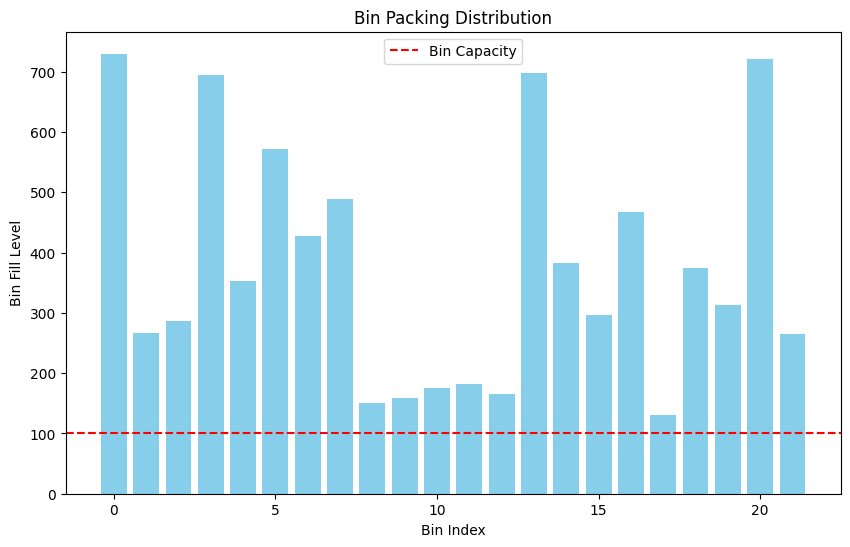

In [5]:
import matplotlib.pyplot as plt

def plot_bins(bins, bin_capacity):
    bin_indices = range(len(bins))
    bin_sums = [sum(bin) for bin in bins]
    plt.figure(figsize=(10, 6))
    plt.bar(bin_indices, bin_sums, color='skyblue')
    plt.axhline(y=bin_capacity, color='r', linestyle='--', label='Bin Capacity')
    plt.xlabel('Bin Index')
    plt.ylabel('Bin Fill Level')
    plt.title('Bin Packing Distribution')
    plt.legend()
    plt.show()

# Visualize the bin distribution
plot_bins(bins, bin_capacity)


Download the Result File

In [6]:
from google.colab import files
files.download('bin_packing_result.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>